# 指数轮动策略new

In [1]:
from tick_trade_api import TradeAPI
# 输入指定账户
trade_api=TradeAPI('79855037',order_policy=MarketPolicy)



In [2]:
source_code="""

# 指数轮动策略
import pandas as pd
#初始化函数
def init(context):   
    # 按月交易第一个交易日
    run_monthly(trade,date_rule=1)
    # 输入需要交易的ETF
    context.security = ['159901.OF', # 深证100ETF
                        '510050.OF', # 上证50ETF
                        '159915.OF', # 创业板ETF
                        '510300.OF', # 沪深300ETF
                        '510500.OF', # 中证500ETF
                        '510180.OF', # 上证180ETF
                        '159902.OF', # 中小板100ETF
                        '159905.OF', # 深红利ETF
                        ]
    # 指数强度系数（天）
    context.N = 20
#交易函数
def trade(context,bar_dict):
    # 获取指数行情数据
    price = history(context.security,['close'],context.N,'1d',True,'pre',is_panel=1)
    # 获取收盘价
    df = price['close']
    # 计算强弱
    indexreturn = df.iloc[-1]/df.iloc[0]-1
    # 排序
    indexreturn = indexreturn.sort_values()
    # 选取最强指数及强弱值
    index_T = indexreturn.iloc[-1]
    index = list(indexreturn.index)[-1]
    
    if index_T>0:
        # 获取当前持仓
        holdindex = list(context.portfolio.stock_account.positions.keys())
        if len(holdindex)<1:
            # 买入
            order_target_percent(index,1)
            print('最强指数{},强弱度{},买入'.format(index,round(index_T,4)))
        else:
            for i in holdindex:
                if i == index:
                    print('==> i == index')
                else:
                    # 清仓
                    order_target(i, 0)
                    # 买入
                    order_target_percent(index,1)
                    print('最强指数{},强弱度{},买入'.format(index,round(index_T,4)))
            
#设置风控
def handle_bar(context,bar_dict):
    # 获取指数行情数据
    price = history(context.security,['close'],context.N,'1d',True,'pre',is_panel=1)
    # 获取收盘价
    df = price['close']
    # 计算强弱
    indexreturn = df.iloc[-1]/df.iloc[0]-1
    # 排序
    indexreturn = indexreturn.sort_values()
    # 选取最强指数及强弱值
    index_T = indexreturn.iloc[-1]
    index = list(indexreturn.index)[-1]
    # 获取当前持仓
    holdindex = list(context.portfolio.stock_account.positions.keys())
    # 择时判定
    if index_T<=0:
        for i in holdindex:
            # 清仓
            order_target(i, 0)
            # 打印
            print('最强指数强弱度{},清仓'.format(index_T))
"""
            
            

In [ ]:
'''
#=====================================================================================================
#=====================================================================================================
#导包操作
import pandas as pd
#=====================================================================================================
#=====================================================================================================
#初始化函数，用于初始条件，其中爱吃醋 context.security中确定策略判断的几大板块
def init(context):   
    run_monthly(trade,date_rule=3)
    context.security=['150019.SZ','159901.OF','510050.OF',
                      '159915.OF','510300.OF',
                      '510500.OF','510180.OF',
                      '159902.OF','159905.OF']
                      #注意：格式可以一行，也可以多行，不影响代码运行，4行还只是context.security里的。
#=====================================================================================================
#=====================================================================================================
#板块强弱衡量函数
def bankuai(context,bar_dict):  
    df={'security':[],'qd':[]}
    stocks=context.security
    for i in stocks:
        df['security'].append(i)
        price = history(i, ['close'], 25, '1d')
        p20=price['close'].iloc[-20]
        p1=price['close'].iloc[-1]
        m=(p1-p20)/p20
        df['qd'].append(m)
    df = pd.DataFrame(df).sort_values(by ='qd', ascending=False)
    x=df['qd'].iloc[0]
    y=['123']
    if x >0 :
        return df['security'].iloc[0]
    else:
        return y
    #直接输出最强的板块，如果所有板块都是负数，那么输出固定值y=['123']
#=====================================================================================================
#=====================================================================================================
#交易函数
def trade(context,bar_dict):
    n=bankuai(context,bar_dict)
    d=len(n)
    #首先判断所有板块是否变弱，变弱则清仓
    if d==1:
        if len(list(context.portfolio.stock_account.positions.keys())) > 0:
            for stock in list(context.portfolio.stock_account.positions.keys()):
                order_target(stock, 0)
    #其次判断最强板块是否是我们持仓的板块，不是则先卖持仓，后买最强板块。
    else:
        if n not in list(list(context.portfolio.stock_account.positions.keys())):
            for stock in list(context.portfolio.stock_account.positions.keys()):
                order_target(stock, 0)
            if len(list(context.portfolio.stock_account.positions.keys())) < 1:
                order_target_value(n, context.portfolio.stock_account.available_cash)
#=====================================================================================================
#=====================================================================================================
#设置止损止盈
def handle_bar(context,bar_dict):
    n=bankuai(context,bar_dict)
    d=len(n)
    #判断函数，用于判断板块，如果所有板块都弱了,那么n是1，执行清仓。
    if d==1:
        if len(list(context.portfolio.stock_account.positions.keys())) > 0:
            for stock in list(list(context.portfolio.stock_account.positions.keys())):
                order_target(stock, 0)
'''

In [3]:
# 系统重置
try:
    import shutil
    shutil.rmtree('persist/研究环境策略')
except:
    pass


In [ ]:
# 模拟运行
#rtrade = research_trade('研究环境策略', source_code, capital_base=float(10000000), frequency='MINUTE', trade_api=trade_api)#trade_api可传入List[TradeAPI]，实现多账户交易
rtrade = research_trade('研究环境策略', source_code, capital_base=float(10000000), frequency='DAILY', trade_api=trade_api)#trade_api可传入List[TradeAPI]，实现多账户交易


2022-05-31 09:38:15.371998 - INFO - 开始research_trade运行...


2021-06-01 09:31:00.000000 - INFO - 最强指数159915.OF,强弱度0.0823,买入
2021-07-01 09:31:00.000000 - INFO - ==> i == index
2021-07-28 09:31:00.000000 - INFO - 最强指数强弱度-0.004474861805738306,清仓
2021-08-02 09:31:00.000000 - INFO - 最强指数159915.OF,强弱度0.024,买入
2021-08-18 09:31:00.000000 - INFO - 最强指数强弱度-0.010845986984815648,清仓
2021-09-01 09:31:00.000000 - INFO - 最强指数510500.OF,强弱度0.0488,买入
2021-10-08 09:31:00.000000 - INFO - 最强指数159915.OF,强弱度0.0175,买入
2021-11-01 09:31:00.000000 - INFO - ==> i == index
2021-12-01 09:31:00.000000 - INFO - ==> i == index
2022-01-04 09:31:00.000000 - INFO - 最强指数159902.OF,强弱度0.029,买入
2022-01-07 09:31:00.000000 - INFO - 最强指数强弱度-0.01349708171206232,清仓
2022-03-01 09:31:00.000000 - INFO - 最强指数510500.OF,强弱度0.0144,买入
2022-03-08 09:31:00.000000 - INFO - 最强指数强弱度-0.012539598732840496,清仓


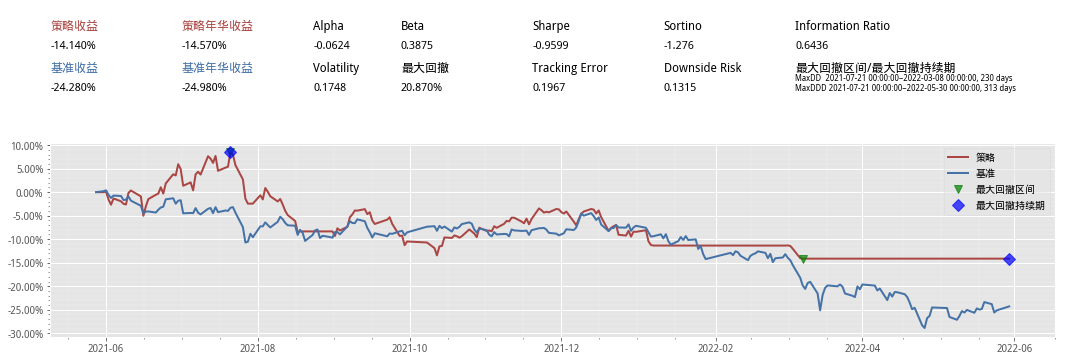

{'analyser': {'benchmark_portfolio':                 close  unit_net_value
  2021-05-28  5321.0886        1.000000
  2021-05-31  5331.5696        1.001970
  2021-06-01  5341.6798        1.003870
  2021-06-02  5289.9736        0.994153
  2021-06-03  5255.2855        0.987634
  2021-06-04  5282.2772        0.992706
  2021-06-07  5277.6271        0.991832
  2021-06-08  5232.1165        0.983279
  2021-06-09  5236.4493        0.984094
  2021-06-10  5271.4661        0.990674
  2021-06-11  5224.7030        0.981886
  2021-06-15  5166.5597        0.970959
  2021-06-16  5080.4909        0.954784
  2021-06-17  5101.8924        0.958806
  2021-06-18  5102.4657        0.958914
  2021-06-21  5090.3854        0.956644
  2021-06-22  5122.1583        0.962615
  2021-06-23  5147.3938        0.967357
  2021-06-24  5155.9738        0.968970
  2021-06-25  5239.9684        0.984755
  2021-06-28  5251.7604        0.986971
  2021-06-29  5190.5445        0.975467
  2021-06-30  5224.0410        0.981762
  202

In [5]:
# 回测运行
research_strategy(source_code, start_date=None, end_date=None, capital_base=100000, frequency='DAILY', stock_market='STOCK', benchmark=None)
#research_strategy(source_code, start_date='20191230', end_date='20220527', capital_base=float(1000000), frequency='MINUTE', stock_market='STOCK', benchmark=None)
